In [5]:
import ast
import io
from pathlib import Path
import requests

import numpy as np
from PIL import Image
from fastapi import FastAPI, File
from fmlwright.core import data_sources
from fmlwright.generator.run import run as build_generator
import matplotlib.pyplot as plt

In [20]:
img_file = Path('../../test_images/9.png')

In [21]:
image = Image.open(img_file)

image = np.array(image)
if image.shape[2] == 4:
    image = np.delete(image, -1, axis=-1)
image = image / 255.0

# Generate image uvicorn
-----

In [ ]:
r = requests.get("http://127.0.0.1:8000/categories")
print(f"Status code: {r.status_code}")
print(f"Response: {r.json()}")

In [ ]:
request = {
    "image": image.tolist(),
    "n_samples": 2,
    "categories": []
}

In [ ]:
r = requests.post(
    url="http://127.0.0.1:8000/generate",
    json=request
)


In [ ]:
final_image = r.json()

In [ ]:
living_room = final_image["living_room"]
np_image = np.array(living_room['1']['image'])
preprocessed_img = (np_image * 0.5) + 0.5

In [ ]:
plt.imshow(preprocessed_img)

# Generate image docker
---

In [22]:
r = requests.get("http://0.0.0.0:5000/categories")
print(f"Status code: {r.status_code}")
print(f"Response: {r.json()}")

Status code: 200
Response: ['living_room']


In [23]:
request = {
    "image": image.tolist(),
    "n_samples": 2,
    "categories": []
}

In [24]:
r = requests.post(
    url="http://0.0.0.0:5000/generate",
    json=request
)


In [25]:
final_image = r.json()

In [26]:
living_room = final_image["living_room"]
np_image = np.array(living_room['1']['image'])
preprocessed_img = (np_image * 0.5) + 0.5

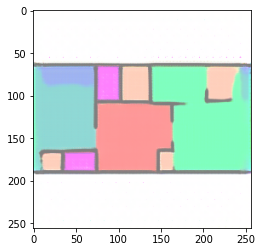

In [27]:
plt.imshow(preprocessed_img)